In [244]:
import secrets

# import easydict
import matplotlib.pyplot as plt
import torch
# from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms
import torch.utils.data as data
from tqdm import tqdm
import pandas as pd
import numpy as np

# from model import LSTMVAE
from numpy import recarray
from sklearn.model_selection import train_test_split
from torchvision import transforms
import torch.utils.data as data
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import torch
from torch import nn
from torch.nn import functional as F
import os
from torch.nn.utils.rnn import pad_sequence
import copy

if torch.cuda.is_available():
    device = 'cuda'
    print('on cuda')
if torch.backends.mps.is_available():
    device = 'mps'
    print('on mps')
else:
    device = 'cpu'
    print('on cpu')
# device = 'cpu'

RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)
torch.mps.manual_seed(RANDOM_SEED)

on mps


In [245]:
def plot_time_series_class(data, class_name, ax, n_steps=10):
  time_series_df = pd.DataFrame(data)

  smooth_path = time_series_df.rolling(n_steps).mean()
  path_deviation = 2 * time_series_df.rolling(n_steps).std()

  under_line = (smooth_path - path_deviation)[0]
  over_line = (smooth_path + path_deviation)[0]

  ax.plot(smooth_path, linewidth=2)
  ax.fill_between(
    path_deviation.index,
    under_line,
    over_line,
    alpha=.125
  )
  ax.set_title(class_name)

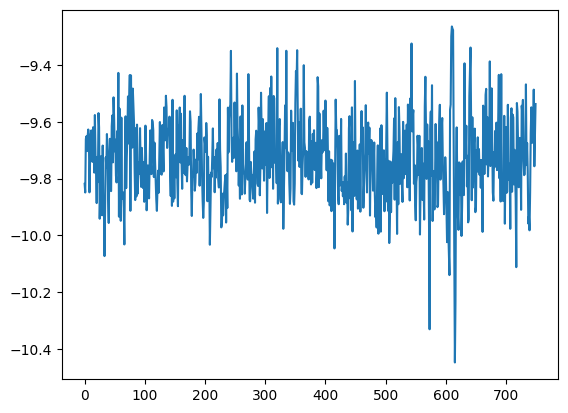

In [246]:
if(platform.system() == 'Darwin'):
    dataset_path = '/Users/jm/VS Code/Python/pythonenv/gait-project/datasets/MHEALTHDATASET_CSV/mHealth_subject1.csv'
else:
    dataset_path = '/home/jm/vscode/Python/pythonenv/gait-project/datasets/MHEALTHDATASET_CSV/mHealth_subject1.csv'

dataset = pd.read_csv(dataset_path)
dataset = dataset['chest acceleration X-axis']
plt.plot(dataset[:750])


## labels: 

* L0: NULL Class
* L1: Standing still (1 min)
* L2: Sitting and relaxing (1 min)
* L3: Lying down (1 min)
* L4: Walking (1 min)
* L5: Climbing stairs (1 min)
* L6: Waist bends forward (20x)
* L7: Frontal elevation of arms (20x)
* L8: Knees bending (crouching) (20x)
* L9: Cycling (1 min)
* L10: Jogging (1 min)
* L11: Running (1 min)
* L12: Jump front & back (20x)

In [247]:
# # cwd = os.getcwd() + "/MHEALTHDATASET_CSV"
# if(platform.system() == 'Darwin'):
#     cwd = '/Users/jm/VS Code/Python/pythonenv/gait-project/datasets/MHEALTHDATASET_CSV'
# else:
#     cwd = '/home/jm/vscode/Python/pythonenv/gait-project/datasets/MHEALTHDATASET_CSV'

# print(cwd)

# os.chdir(cwd)

In [248]:
# #split data into sections by label

# df = pd.DataFrame()
# dataframes = []
# for file in os.listdir():
#     if file.endswith(".csv"):
#         file_path = f"{cwd}/{file}"
#         temp = pd.read_csv(file_path)
#         dataframes.append(temp)
#         print('file:', file, '| size = ', len(temp))
        
# df = pd.concat(dataframes)

In [249]:
# #extracts x,y,z chest accel data into different label groups
# def partition_data(label, dataframe):
#     x_data = []
#     y_data = []
#     z_data = []
#     activity = []
    
#     for i in range(len(dataframe)):
#         if(df['label'].iloc[i] == label):
#             x_data.append(df['chest acceleration X-axis'].iloc[i])
#             y_data.append(df['chest acceleration Y-axis'].iloc[i])
#             z_data.append(df['chest acceleration Z-axis'].iloc[i])
#             activity.append(df['label'].iloc[i])
            
    
#     partitioned_df = pd.DataFrame(
#                                   {
#         'x-axis': x_data,
#         'y-axis': y_data,
#         'z-axis': z_data,
#         'label': activity
#                                   })
    
#     return partitioned_df

In [250]:
# temp = partition_data(0, df)
# print(temp)

In [251]:
# #splitting all mhealth data based on label, used for classification
# df_null = partition_data(0, df)
# df_stand = partition_data(1, df) 
# df_sit = partition_data(2, df)
# df_lying = partition_data(3, df)
# df_walk = partition_data(4, df)
# df_stairs = partition_data(5, df)
# df_waist_bend = partition_data(6, df)
# df_arms = partition_data(7, df) 
# df_knee_bend = partition_data(8, df) 
# df_cycle = partition_data(9, df) 
# df_jog = partition_data(10, df) 
# df_run = partition_data(11, df) 
# df_jump = partition_data(12, df) 

In [252]:
class mHealth(data.Dataset):

    def __init__(self, dataframe):
        """
        Args:
            csv_file (string): path to csv file with data
        """
        self.dataset = dataframe

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, index):
        """
        Args:
            index (int): index

        Returns:
            (sequence, [128, 3])
            returns the time series data of length 128 
            (X-axis, Y-axis, Z-axis)
        """
        #return sequence of length 128 x 3
        sequence = torch.tensor(self.dataset[index:index+128].to_numpy()).type(torch.float32) 

        return sequence

def collate_fn(data):
    inputs = [torch.tensor(d) for d in data]

    inputs = pad_sequence(inputs, batch_first=True)

    return inputs

In [253]:
if(platform.system() == 'Darwin'):
    sub_1_df = pd.read_csv('/Users/jm/VS Code/Python/pythonenv/gait-project/datasets/MHEALTHDATASET_CSV/mHealth_subject1.csv')
else:
  sub_1_df = pd.read_csv('/home/jm/vscode/Python/pythonenv/gait-project/datasets/MHEALTHDATASET_CSV/mHealth_subject1.csv')
sub_1_df = sub_1_df['chest acceleration X-axis'] #drop all columns that aren't chest accel info

train_df, val_df = train_test_split(
  sub_1_df,
  test_size=0.15,
  random_state=RANDOM_SEED
)
sub_1_df

0        -9.8184
1        -9.8489
2        -9.6602
3        -9.6507
4        -9.7030
           ...  
161275   -9.4032
161276   -9.5201
161277   -9.3682
161278   -8.6702
161279   -8.7211
Name: chest acceleration X-axis, Length: 161280, dtype: float64

In [254]:
split_idx = int(len(sub_1_df) * 0.8)

train_set = mHealth(
    dataframe=sub_1_df[:split_idx],
)

test_set = mHealth(
    dataframe=sub_1_df[split_idx:],
)

batch_size = 512
input_size = 1
hidden_size = 64
latent_size = 16
num_layers = 2

In [255]:
print(train_set[124].shape)

torch.Size([128])


In [256]:
train_loader = torch.utils.data.DataLoader(
    dataset=train_set,
    batch_size=batch_size,
    collate_fn=collate_fn,
    shuffle=True,
    drop_last=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_set,
    batch_size=batch_size,
    collate_fn=collate_fn,
    shuffle=True,
    drop_last=True
)

print(f"Dataloaders: {train_loader}")
print(f"Length of train_dataloader: {len(train_loader)} batches of {batch_size}")


for idx, data in enumerate(train_loader):

    print(data.shape)
    
    break
    print("Data shape:", datas.shape)
    #print("Labels:", labels)
   # ("Labels shape:", len(labels))
    print("labels shape", labels.shape)
    break



Dataloaders: <torch.utils.data.dataloader.DataLoader object at 0x366773340>
Length of train_dataloader: 252 batches of 512
torch.Size([512, 128])


/var/folders/4p/ths4mw3d4gx2tp708qp5jbqr0000gn/T/ipykernel_1340/208133306.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = [torch.tensor(d) for d in data]


In [257]:
class Encoder(nn.Module):

  def __init__(self, seq_len, n_features, embedding_dim=64):
    super(Encoder, self).__init__()

    self.seq_len, self.n_features = seq_len, n_features
    self.embedding_dim, self.hidden_dim = embedding_dim, 2 * embedding_dim
    # print("hidden size: ", self.hidden_dim)
    
    self.rnn1 = nn.LSTM(
      input_size=n_features,
      hidden_size=self.hidden_dim,
      # output_size=self.embedding_dim,
      num_layers=1,
      batch_first=True
    )
    
    self.rnn2 = nn.LSTM(
      input_size=self.hidden_dim,
      hidden_size=embedding_dim,
      num_layers=1,
      batch_first=True
    )

  def forward(self, x):
    x = x.reshape((512, self.seq_len, self.n_features))
    # print("seq len: ", self.seq_len)
    # print("feat: ", self.n_features)
    # print("x shape", x.shape)
    
    x, (_, _) = self.rnn1(x)
    # print("x shape rnn1", x.shape)
    x, (hidden_n, _) = self.rnn2(x)
    # print("hiddenn shape: ", hidden_n.shape)
    # print("x shape rnn2", x.shape)
    # print("feat ", self.n_features, self.embedding_dim)
    return hidden_n.reshape((512, self.n_features, self.embedding_dim))

In [258]:
class Decoder(nn.Module):

  def __init__(self, seq_len, input_dim=64, n_features=3):
    super(Decoder, self).__init__()

    self.seq_len, self.input_dim = seq_len, input_dim
    self.hidden_dim, self.n_features = 2 * input_dim, n_features

    self.rnn1 = nn.LSTM(
      input_size=input_dim,
      hidden_size=input_dim,
      num_layers=1,
      batch_first=True
    )

    self.rnn2 = nn.LSTM(
      input_size=input_dim,
      hidden_size=self.hidden_dim,
      num_layers=1,
      batch_first=True
    )
    
    # self.rnn3 = nn.LSTM(
    #   input_size=self.hidden_dim,
    #   hidden_size= 16384,
    #   num_layers=1,
    #   batch_first=True
    # )
    

    self.output_layer = nn.Linear(int(self.hidden_dim), n_features) #[96 -> 3]

  def forward(self, x):
    # print("x shape: ", x.shape)
    x = x.repeat(1, self.seq_len, self.n_features)
    # print("x shape repeat: ", x.shape)
    x = x.reshape((batch_size, self.seq_len, self.input_dim))
    # print("decoder xshape pre rnn: ", x.shape)
    x, (hidden_n, cell_n) = self.rnn1(x)
    # print("decoder xshape rnn1: ", x.shape)
    x, (hidden_n, cell_n) = self.rnn2(x)
    # print("decoder xshape rnn2: ", x.shape)
    # x, (hidden_n, cell_n) = self.rnn3(x)
    # print("input dim: ", int(self.input_dim/2)*3)
    # x = x.reshape((512, self.seq_len, int(self.input_dim/2)*3))
  
    # print("decoder xshape: ", x.shape)
    x = self.output_layer(x)
    # print("reconstruction xshape: ", x.shape)
    return x

In [259]:
class RecurrentAutoencoder(nn.Module):

  def __init__(self, seq_len, n_features, embedding_dim=64):
    super(RecurrentAutoencoder, self).__init__()

    self.encoder = Encoder(seq_len, n_features, embedding_dim).to(device)
    self.decoder = Decoder(seq_len, embedding_dim, n_features).to(device)

  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)

    return x

In [260]:
model = RecurrentAutoencoder(128, 1, 64)
model = model.to(device)

In [261]:
def train_model(model, train_dataset, val_dataset, n_epochs):
  optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
  criterion = nn.L1Loss(reduction='sum').to(device)
  history = dict(train=[], val=[])

  best_model_wts = copy.deepcopy(model.state_dict())
  best_loss = 10000.0
  
  for epoch in range(1, n_epochs + 1):
    model = model.train()

    train_losses = []
    for seq_true in train_dataset:
      optimizer.zero_grad()

      seq_true = seq_true.to(device).unsqueeze(dim=2)
      seq_pred = model(seq_true)
      
      # print("seq_true shape: ", seq_true.shape)
      # print("seq_pred shape: ", seq_pred.shape)
      
      loss = criterion(seq_pred, seq_true)

      loss.backward()
      optimizer.step()

      train_losses.append(loss.item())

    val_losses = []
    model = model.eval()
    with torch.no_grad():
      for seq_true in val_dataset:

        seq_true = seq_true.to(device).unsqueeze(dim=2)
        seq_pred = model(seq_true)

        loss = criterion(seq_pred, seq_true)
        val_losses.append(loss.item())

    train_loss = np.mean(train_losses)
    val_loss = np.mean(val_losses)

    history['train'].append(train_loss)
    history['val'].append(val_loss)

    if val_loss < best_loss:
      best_loss = val_loss
      best_model_wts = copy.deepcopy(model.state_dict())

    print(f'Epoch {epoch}: train loss {train_loss} val loss {val_loss}')

  model.load_state_dict(best_model_wts)
  return model.eval(), history

In [271]:
model, history = train_model(
  model, 
  train_loader, 
  test_loader, 
  n_epochs=5
)

/var/folders/4p/ths4mw3d4gx2tp708qp5jbqr0000gn/T/ipykernel_1340/208133306.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = [torch.tensor(d) for d in data]


Epoch 1: train loss 151943003.67460316 val loss 206024072.8888889
Epoch 2: train loss 153118897.6190476 val loss 201661239.36507937
Epoch 3: train loss 151813618.41269842 val loss 201762466.2857143
Epoch 4: train loss 151813256.76190478 val loss 201868530.53968254
Epoch 5: train loss 151814131.23809522 val loss 201982357.58730158


In [275]:
def predict(model, dataset):
  predictions, losses = [], []
  criterion = nn.L1Loss(reduction='sum').to(device)
  with torch.no_grad():
    model = model.eval()
    for seq_true in dataset:
      
      seq_true = seq_true.to(device).unsqueeze(dim=2)
      seq_pred = model(seq_true)

      loss = criterion(seq_pred, seq_true)

      predictions.append(seq_pred.cpu().numpy().flatten())
      losses.append(loss.item())
  return predictions, losses

In [276]:
predictions, losses = predict(model, train_loader)

# sns.distplot(losses, bins=50, kde=True);

/var/folders/4p/ths4mw3d4gx2tp708qp5jbqr0000gn/T/ipykernel_1340/208133306.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = [torch.tensor(d) for d in data]


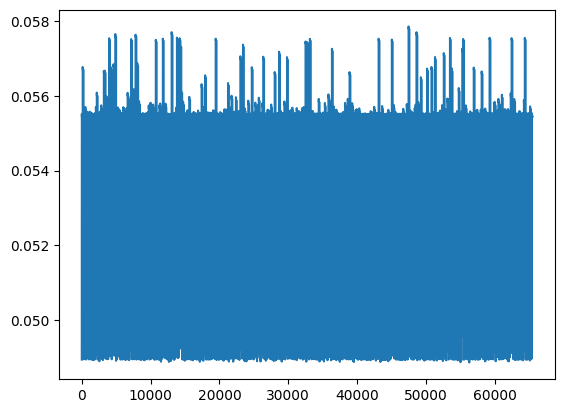

In [279]:
plt.plot(predictions[1])